In [2]:
import re

# Se cargan los logs capturados en las pruebas
file = open('./logs_test_day.log', 'r')
LOG_FILE = file.readlines()
logs_list = []

for i in range(0, len(LOG_FILE)):
    # Limpieza de expresiones regulares, esto por el color del logger del servidor en Express.js
    ANSI_CLEANER = re.compile(r"(\x9B|\x1B\[)[0-?]*[ -/]*[@-~]")
    clean_log_petition = ANSI_CLEANER.sub("", LOG_FILE[i])
    petition_log_list = clean_log_petition.split(" ")
    # Se añade la lista creada a la lista que se desea analizar
    if (petition_log_list[0] == "POST") or (petition_log_list[0] == "PUT") or (petition_log_list[0] == "GET") or (petition_log_list[0] == "DELETE"):
        logs_list.append(petition_log_list)

In [3]:
import pandas as pd
pd.__version__

'1.1.4'

In [5]:
df = pd.DataFrame(logs_list, columns =['Petition', 'Route', 'Status','Time (ms)','Dummy ms','Dummy -', 'idk'])

In [6]:
df.drop(['Dummy ms', 'Dummy -', 'idk'], axis=1, inplace=True)
df

,Petition,Route,Status,Time (ms)
0,POST,/api/register/login,200,291.705
1,POST,/api/register/dashboard,200,3.286
2,POST,/api/register/init,200,341.374
3,POST,/api/register/registervoter,201,18.535
4,POST,/api/register/dashboard,200,0.845
...,...,...,...,...
453,PUT,/api/register/closevotingperiod,403,0.589
454,POST,/api/register/login,200,252.013
455,POST,/api/register/dashboard,200,1.647
456,PUT,/api/register/closevotingperiod,200,37.145


In [8]:
df['Time (ms)'] = df['Time (ms)'].apply(lambda col:pd.to_numeric(col, errors='coerce'))
df.dtypes

Petition      object
Route         object
Status        object
Time (ms)    float64
dtype: object

In [9]:
df.describe()

,Time (ms)
count,456.000000
mean,1457.348564
std,4971.956487
min,0.511000
25%,2.338000
50%,6.819000
75%,18.696000
max,60263.424000


In [10]:
average_time_per_route = df.groupby(['Route']).mean()
average_time_per_route.to_csv('average_time_per_route.csv')
average_time_per_route


,Time (ms)
Route,
/api/fingerprint/enroll,10909.511889
/api/fingerprint/printinstructions,1.991897
/api/fingerprint/search,6265.844000
/api/register/closeregistration,710.670000
/api/register/closevotingperiod,12.924000
/api/register/dashboard,1.191971
/api/register/getresults,31.671000
/api/register/init,341.374000
/api/register/login,271.859000


In [11]:
standar_deviation_per_route = df.groupby(['Route']).std()
standar_deviation_per_route.to_csv('standar_deviation_per_route.csv')
standar_deviation_per_route

,Time (ms)
Route,
/api/fingerprint/enroll,2333.494471
/api/fingerprint/printinstructions,0.892995
/api/fingerprint/search,13952.348227
/api/register/closeregistration,NaN
/api/register/closevotingperiod,20.977203
/api/register/dashboard,0.665755
/api/register/getresults,NaN
/api/register/init,NaN
/api/register/login,28.066482


In [12]:
min_value_per_route = df.groupby(['Route']).min()
min_value_per_route.to_csv('min_value_per_route.csv')
min_value_per_route

,Petition,Status,Time (ms)
Route,,,
/api/fingerprint/enroll,POST,200,7406.411
/api/fingerprint/printinstructions,POST,200,0.788
/api/fingerprint/search,POST,-,1191.392
/api/register/closeregistration,PUT,200,710.670
/api/register/closevotingperiod,PUT,200,0.589
/api/register/dashboard,POST,200,0.511
/api/register/getresults,GET,200,31.671
/api/register/init,POST,200,341.374
/api/register/login,POST,200,252.013


In [13]:
max_value_per_route = df.groupby(['Route']).max()
max_value_per_route.to_csv('max_value_per_route.csv')
max_value_per_route

,Petition,Status,Time (ms)
Route,,,
/api/fingerprint/enroll,POST,206,15782.275
/api/fingerprint/printinstructions,POST,200,6.358
/api/fingerprint/search,POST,206,60256.504
/api/register/closeregistration,PUT,200,710.670
/api/register/closevotingperiod,PUT,403,37.145
/api/register/dashboard,POST,200,3.286
/api/register/getresults,GET,200,31.671
/api/register/init,POST,200,341.374
/api/register/login,POST,200,291.705


In [14]:
import matplotlib.pyplot as plt

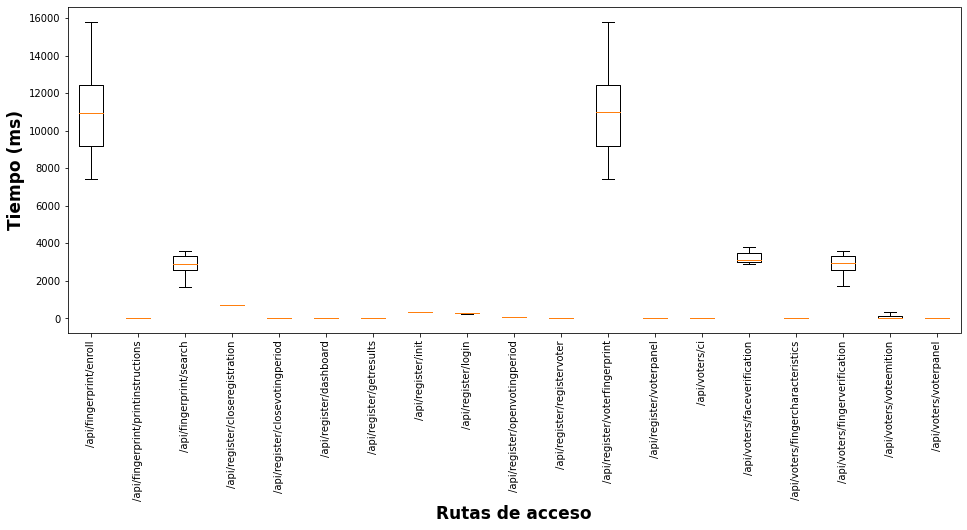

In [17]:
# Gráficas finales para la latencia del sistema por tipo de peticiones

api_fingerprint_enroll = df.loc[df['Route']=='/api/fingerprint/enroll']['Time (ms)']
api_fingerprint_printinstructions = df.loc[df['Route']=='/api/fingerprint/printinstructions']['Time (ms)']
api_fingerprint_search = df.loc[df['Route']=='/api/fingerprint/search']['Time (ms)'].dropna()
api_register_closeregistration = df.loc[df['Route']=='/api/register/closeregistration']['Time (ms)']
api_register_closevotingperiod = df.loc[df['Route']=='/api/register/closevotingperiod']['Time (ms)']
api_register_closevotingperiod.drop([452,453], axis=0, inplace=True)
api_register_dashboard = df.loc[df['Route']=='/api/register/dashboard']['Time (ms)']
api_register_getresults = df.loc[df['Route']=='/api/register/getresults']['Time (ms)']
api_register_init = df.loc[df['Route']=='/api/register/init']['Time (ms)']
api_register_login = df.loc[df['Route']=='/api/register/login']['Time (ms)']
api_register_openvotingperiod = df.loc[df['Route']=='/api/register/openvotingperiod']['Time (ms)']
api_register_registervoter = df.loc[df['Route']=='/api/register/registervoter']['Time (ms)']
api_register_voterfingerprint = df.loc[df['Route']=='/api/register/voterfingerprint']['Time (ms)']
api_register_voterpanel = df.loc[df['Route']=='/api/register/voterpanel']['Time (ms)']
api_voters_ci = df.loc[df['Route']=='/api/voters/ci']['Time (ms)']
api_voters_faceverification = df.loc[df['Route']=='/api/voters/faceverification']['Time (ms)']
api_voters_fingercharacteristics = df.loc[df['Route']=='/api/voters/fingercharacteristics']['Time (ms)']
api_voters_fingerverification = df.loc[df['Route']=='/api/voters/fingerverification']['Time (ms)'].dropna()
api_voters_voteemition = df.loc[df['Route']=='/api/voters/voteemition']['Time (ms)']
api_voters_voterpanel = df.loc[df['Route']=='/api/voters/voterpanel']['Time (ms)']

plt.figure(figsize=(16,6))

labels = ['/api/fingerprint/enroll', '/api/fingerprint/printinstructions',
       '/api/fingerprint/search', '/api/register/closeregistration',
       '/api/register/closevotingperiod', '/api/register/dashboard',
       '/api/register/getresults', '/api/register/init', '/api/register/login',
       '/api/register/openvotingperiod', '/api/register/registervoter',
       '/api/register/voterfingerprint', '/api/register/voterpanel',
       '/api/voters/ci', '/api/voters/faceverification',
       '/api/voters/fingercharacteristics', '/api/voters/fingerverification',
       '/api/voters/voteemition', '/api/voters/voterpanel']

plt.boxplot([api_fingerprint_enroll, api_fingerprint_printinstructions, api_fingerprint_search, api_register_closeregistration, api_register_closevotingperiod, api_register_dashboard, api_register_getresults, api_register_init, api_register_login, api_register_openvotingperiod, api_register_registervoter, api_register_voterfingerprint, api_register_voterpanel, api_voters_ci, api_voters_faceverification, api_voters_fingercharacteristics, api_voters_fingerverification, api_voters_voteemition, api_voters_voterpanel], labels=labels, showfliers=False)

# plt.title('Tiempos de respuesta del sistema', fontdict={'fontweight':'bold', "fontsize":20})
plt.ylabel('Tiempo (ms)',fontdict={'fontweight':'bold', "fontsize":17})
plt.xlabel('Rutas de acceso',fontdict={'fontweight':'bold', "fontsize":17})

plt.xticks(rotation='vertical')

plt.savefig('evoting_general_response_time.png', dpi=300)

plt.show()

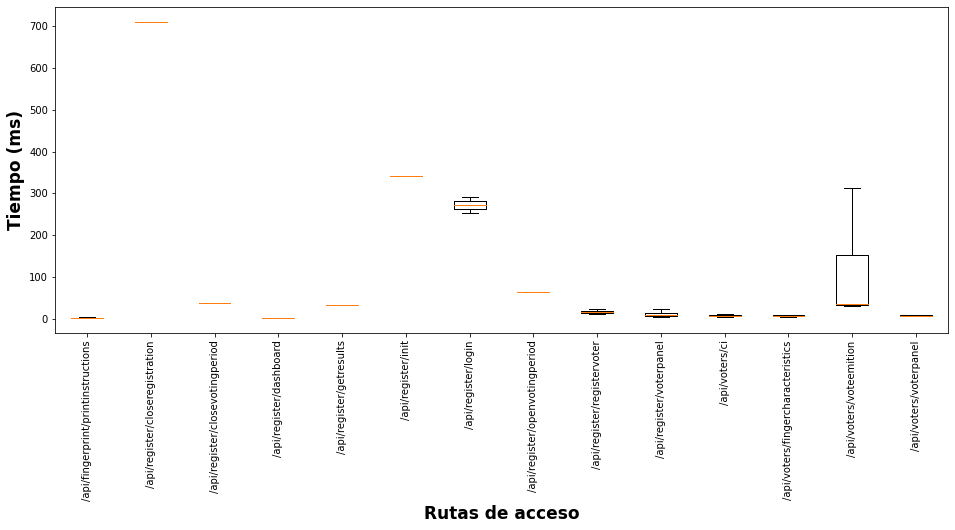

In [18]:
# Descartando las rutas que utilizan aspectos biométricos


api_fingerprint_printinstructions = df.loc[df['Route']=='/api/fingerprint/printinstructions']['Time (ms)']
api_register_closeregistration = df.loc[df['Route']=='/api/register/closeregistration']['Time (ms)']
api_register_closevotingperiod = df.loc[df['Route']=='/api/register/closevotingperiod']['Time (ms)']
api_register_closevotingperiod.drop([452,453], axis=0, inplace=True)
api_register_dashboard = df.loc[df['Route']=='/api/register/dashboard']['Time (ms)']
api_register_getresults = df.loc[df['Route']=='/api/register/getresults']['Time (ms)']
api_register_init = df.loc[df['Route']=='/api/register/init']['Time (ms)']
api_register_login = df.loc[df['Route']=='/api/register/login']['Time (ms)']
api_register_openvotingperiod = df.loc[df['Route']=='/api/register/openvotingperiod']['Time (ms)']
api_register_registervoter = df.loc[df['Route']=='/api/register/registervoter']['Time (ms)']
api_register_voterpanel = df.loc[df['Route']=='/api/register/voterpanel']['Time (ms)']
api_voters_ci = df.loc[df['Route']=='/api/voters/ci']['Time (ms)']
api_voters_fingercharacteristics = df.loc[df['Route']=='/api/voters/fingercharacteristics']['Time (ms)']
api_voters_voteemition = df.loc[df['Route']=='/api/voters/voteemition']['Time (ms)']
api_voters_voterpanel = df.loc[df['Route']=='/api/voters/voterpanel']['Time (ms)']

plt.figure(figsize=(16,6))

labels = ['/api/fingerprint/printinstructions',
       '/api/register/closeregistration',
       '/api/register/closevotingperiod', '/api/register/dashboard',
       '/api/register/getresults', '/api/register/init', '/api/register/login',
       '/api/register/openvotingperiod', '/api/register/registervoter',
       '/api/register/voterpanel',
       '/api/voters/ci', '/api/voters/fingercharacteristics',
       '/api/voters/voteemition', '/api/voters/voterpanel']

plt.boxplot([api_fingerprint_printinstructions, api_register_closeregistration, api_register_closevotingperiod, api_register_dashboard, api_register_getresults, api_register_init, api_register_login, api_register_openvotingperiod, api_register_registervoter, api_register_voterpanel, api_voters_ci, api_voters_fingercharacteristics, api_voters_voteemition, api_voters_voterpanel], labels=labels, showfliers=False)

# plt.title('Tiempos de respuesta del sistema (Excluyendo factores biométricos)', fontdict={'fontweight':'bold', "fontsize":20})
plt.ylabel('Tiempo (ms)',fontdict={'fontweight':'bold', "fontsize":17})
plt.xlabel('Rutas de acceso',fontdict={'fontweight':'bold', "fontsize":17})

plt.xticks(rotation='vertical')

plt.savefig('evoting_wo_biometric_response_time.png', dpi=300)

plt.show()